In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import accuracy_score

In [ ]:
credit_card_data=pd.read_csv('/content/creditcard.csv')

In [ ]:
 credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35742 entries, 0 to 35741
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    35742 non-null  int64  
 1   V1      35742 non-null  float64
 2   V2      35742 non-null  float64
 3   V3      35742 non-null  float64
 4   V4      35742 non-null  float64
 5   V5      35742 non-null  float64
 6   V6      35741 non-null  float64
 7   V7      35741 non-null  float64
 8   V8      35741 non-null  float64
 9   V9      35741 non-null  float64
 10  V10     35741 non-null  float64
 11  V11     35741 non-null  float64
 12  V12     35741 non-null  float64
 13  V13     35741 non-null  float64
 14  V14     35741 non-null  float64
 15  V15     35741 non-null  float64
 16  V16     35741 non-null  float64
 17  V17     35741 non-null  float64
 18  V18     35741 non-null  float64
 19  V19     35741 non-null  float64
 20  V20     35741 non-null  float64
 21  V21     35741 non-null  float64
 22

In [ ]:
#checking missing values in in each column
credit_card_data.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,1
V7,1
V8,1
V9,1


In [ ]:
#distribution of fraudlent and legit transations
credit_card_data['Class'].value_counts()

,count
Class,
0.0,35638
1.0,103


0-Normal Transaction
1-Fraudlent Transaction

In [ ]:
#separating data for analysis
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [ ]:
print (legit.shape)
print (fraud.shape)

(35638, 31)
(103, 31)


In [ ]:
#statistical measures of data
legit.Amount.describe()

,Amount
count,35638.000000
mean,84.185241
std,227.223359
min,0.000000
25%,7.000000
50%,22.000000
75%,76.000000
max,7879.420000


In [ ]:
fraud.Amount.describe()

,Amount
count,103.000000
mean,90.471165
std,247.173335
min,0.000000
25%,1.000000
50%,3.760000
75%,99.990000
max,1809.680000


In [ ]:
credit_card_data.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,24007.013890,-0.186593,0.055909,0.752026,0.179227,-0.201556,0.102516,-0.094806,0.021671,0.268769,...,0.043058,-0.032782,-0.112858,-0.040645,0.008169,0.135484,0.021354,0.008491,0.003549,84.185241
1.0,20498.291262,-7.762676,5.838647,-10.957218,5.911555,-5.453798,-2.306085,-7.743100,3.867920,-2.961800,...,0.652319,0.628539,-0.354537,-0.362138,-0.234731,0.300023,0.180390,0.822304,0.102481,90.471165


Build a sample dataset containing similar distribution of normal distribution and fraudelent transactions

No. of fraudlent transaction-->492

In [ ]:
legit_sample=legit.sample(n=492)

Concatenating two Dataframes


In [ ]:
new_dataset=pd.concat([legit_sample ,fraud],axis=0)

In [ ]:
 new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18366,29423,0.463615,-2.831369,0.478659,-0.480692,-2.513342,-0.375979,-0.593736,-0.226429,-1.156809,...,0.043560,-0.288427,-0.445747,0.768563,0.316438,-0.165704,-0.026713,0.112979,518.85,0.0
8886,12182,-0.187468,0.893039,2.443297,1.870030,0.184394,0.084015,0.315892,-0.157057,1.080801,...,-0.083522,0.346032,0.096787,0.341439,-1.216540,-0.471877,0.074704,0.025353,0.00,0.0
16643,28008,0.610324,-0.660156,-0.052687,1.479844,-0.365238,-0.108248,0.449898,0.008439,-0.137461,...,0.214483,0.117983,-0.336805,0.232764,0.582121,-0.287554,-0.034590,0.048171,277.00,0.0
4463,3771,0.994144,-1.083274,0.246012,-0.388408,-1.044886,-0.639385,-0.347176,-0.299457,0.532749,...,-0.138545,-0.805954,-0.119050,-0.193389,0.183667,-0.513198,-0.061951,0.051525,242.02,0.0
25565,33665,1.176751,-0.421223,0.144415,-1.238698,-0.582928,-0.724397,-0.003410,-0.176117,1.404311,...,-0.146265,-0.147037,-0.059516,0.171522,0.537445,-0.063226,0.025072,0.018282,49.51,0.0


In [ ]:
 new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,103


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,24368.327236,-0.358742,0.072521,0.656425,0.252827,-0.184052,0.080715,-0.135517,0.120008,0.230604,...,0.107616,-0.046410,-0.101331,0.010650,0.046096,0.118423,0.025709,-0.002552,0.009001,87.068923
1.0,20498.291262,-7.762676,5.838647,-10.957218,5.911555,-5.453798,-2.306085,-7.743100,3.867920,-2.961800,...,0.652319,0.628539,-0.354537,-0.362138,-0.234731,0.300023,0.180390,0.822304,0.102481,90.471165


Spitting data into Features and & Targets

In [ ]:
X=new_dataset.drop(columns ="Class",axis=1)
Y=new_dataset['Class']

In [ ]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
18366  29423  0.463615 -2.831369  0.478659 -0.480692 -2.513342 -0.375979   
8886   12182 -0.187468  0.893039  2.443297  1.870030  0.184394  0.084015   
16643  28008  0.610324 -0.660156 -0.052687  1.479844 -0.365238 -0.108248   
4463    3771  0.994144 -1.083274  0.246012 -0.388408 -1.044886 -0.639385   
25565  33665  1.176751 -0.421223  0.144415 -1.238698 -0.582928 -0.724397   
...      ...       ...       ...       ...       ...       ...       ...   
30442  35926 -3.896583  4.518355 -4.454027  5.547453 -4.121459 -1.163407   
30473  35942 -4.194074  4.382897 -5.118363  4.455230 -4.812621 -1.224645   
30496  35953 -4.844372  5.649439 -6.730396  5.252842 -4.409566 -1.740767   
31002  36170 -5.685013  5.776516 -7.064977  5.902715 -4.715564 -1.755633   
33276  37167 -7.923891 -5.198360 -3.000024  4.420666  2.272194 -3.394483   

             V7        V8        V9  ...       V20       V21       V22  \
18366 -0.5937

In [ ]:
print(Y)

18366    0.0
8886     0.0
16643    0.0
4463     0.0
25565    0.0
        ... 
30442    1.0
30473    1.0
30496    1.0
31002    1.0
33276    1.0
Name: Class, Length: 595, dtype: float64


Spitting data into Testing and Training data


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(595, 30) (476, 30) (119, 30)


Model Training

Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)

In [ ]:
#training the logistic regression model with Training Data
model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=500)

Model Evaluation

Accuracy Score

In [ ]:
#accuracy on training data
X_train_prediction=model.predict(X_train_scaled)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy on Training Data: ',training_data_accuracy)

Accuracy on Training Data:  0.9894957983193278


In [ ]:
#accuracy on test data
X_test_prediction=model.predict(X_test_scaled)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy score on Test Data:',test_data_accuracy)

Accuracy score on Test Data: 0.957983193277311


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'fraud_detection_model.pkl')

# Download the model file to your local machine
from google.colab import files
files.download('fraud_detection_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

# Extract one sample from X_test_scaled
sample_input = X_test_scaled[0]  # Get the first test sample
sample_input_list = sample_input.tolist()  # Convert to Python list

print(sample_input_list)

[-1.5269746212450783, 0.04623592179866051, 0.23467090905355809, 0.08996721826240986, -0.15142644046928885, 0.33161061628967314, 0.06702317271944228, 0.36745925430455795, -0.007190392684846961, 0.5667845863840884, 0.49820444796234686, 0.22629002706805218, 0.13465862195862657, 1.699618094759679, 0.9205223976628832, -0.7208637290107448, 0.19783391501595848, 0.46756972725714, 0.5103322324895503, 0.12134813883505127, -0.0752948239084253, -0.0693020558070294, 0.98142832709419, 0.29151969525626936, -0.5512372594677242, -1.1832018189517168, -0.9729785127017329, 0.5404951934731201, 0.7686620534283655, -0.2642981035772033]


Confusion Matrix:
 [[97  1]
 [ 4 17]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        98
         1.0       0.94      0.81      0.87        21

    accuracy                           0.96       119
   macro avg       0.95      0.90      0.92       119
weighted avg       0.96      0.96      0.96       119



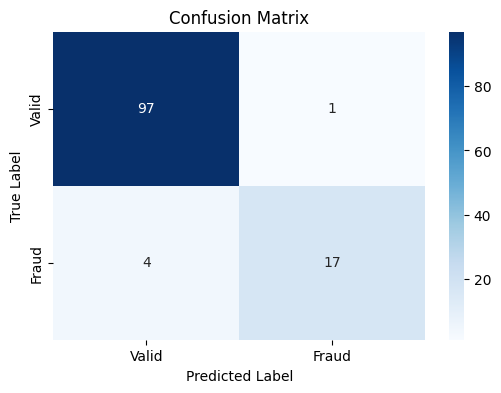

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'X_test' contains test features & 'y_test' contains actual labels
y_pred = model.predict(X_test_scaled)  # Predict on test data

# Generate Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

# Print Confusion Matrix
print("Confusion Matrix:\n", cm)

# Print Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Valid", "Fraud"], yticklabels=["Valid", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()